In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew,kurtosis
import matplotlib.pyplot as plt

In [2]:
print(sns.get_dataset_names())

C:\Users\91882\Anaconda3\lib\site-packages\seaborn\utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\91882\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
tips = sns.load_dataset("tips")

In [4]:
print ("Sex",tips.sex.unique())
print ("Time",tips.time.unique())
print ("Day",tips.day.unique())
print ("smoker",tips.smoker.unique())
print ("size",tips['size'].unique())

Sex [Female, Male]
Categories (2, object): [Female, Male]
Time [Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]
Day [Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]
smoker [No, Yes]
Categories (2, object): [No, Yes]
size [2 3 4 1 6 5]


In [5]:
def add_categorical(df,col):
    df = pd.concat([df,pd.get_dummies(df[col])],1)
    return df

In [6]:
dummy_cols = ['sex','time','day','smoker']
for col in dummy_cols:
    tips = add_categorical(tips,col)

In [7]:
print ("columns in tips data set are :",tips.columns.tolist())

columns in tips data set are : ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'Male', 'Female', 'Lunch', 'Dinner', 'Thur', 'Fri', 'Sat', 'Sun', 'Yes', 'No']


In [8]:
y = tips['tip']
features = ['total_bill','Female','Yes','Dinner','Thur','Fri','Sat'] # yes means smoker
x =  tips[features]

In [9]:
x = sm.add_constant(x)

C:\Users\91882\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
model = sm.OLS(y,x,missing='drop')

In [11]:
fit = model.fit()

In [12]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     28.88
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           1.37e-28
Time:                        20:59:15   Log-Likelihood:                -349.47
No. Observations:                 244   AIC:                             714.9
Df Residuals:                     236   BIC:                             742.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1462      0.479      2.395      0.017       0.203       2.089
total_bill     0.1059      0.008     13.788      0.000       0.091       0.121
Female         0.0376      0.142      0.264      0.792      -0.243       0.318
Yes           -0.1418      0.145     -0.980      0.328      -0.427       0.143
Dinner        -0.1324      0.446     -0.297      0.767      -1.011       0.746
Thur          -0.2262      0.472     -0.479      0.632      -1.157       0.704
Fri           -0.0505      0.321     -0.157      0.875      -0.683       0.582
Sat           -0.1296      0.166     -0.781      0.436      -0.457       0.197
==============================================================================
Omnibus:                       24.388   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.533
Skew:                           0.537   Prob(JB):                     1.30e-10
Kurtosis:                       4.823   Cond. No.                         265.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Objective
 
 DrillDown and understand the output of the model

The total sum of squares (proportional to the variance of the data)
$$SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}$$  , if intercept is present (centered)

In [13]:
TSS = np.sum((y-np.mean(y))**2) if 'const' in x.columns else np.sum(y**2);TSS #Total Sum of Squares

465.2124770491804

The sum of squares of residuals, also called the residual sum of squares:
$${\displaystyle SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}\,}$$

In [14]:
SSR = np.sum((y-fit.fittedvalues)**2);SSR # sum of square of residuals

250.58010271948234

The regression sum of squares, also called the explained sum of squares:
$$SS_{\text{reg}}=\sum _{i}(f_{i}-{\bar {y}})^{2}$$ , or a better approach

If a constant is present, the centered total sum of squares minus the sum of squared residuals. If there is no constant, the uncentered total sum of squares is used.

In [15]:
RSS = TSS- SSR ; RSS# regression sum of squares

214.63237432969805

The most general definition of the coefficient of determination is
$${\displaystyle R^{2}\equiv 1-{SS_{\rm {res}} \over SS_{\rm {tot}}}\,}$$

It can be concluded that why r2 is defined as 1 - SSR / TSS

In [16]:
r2 = 1- SSR/TSS ; r2 

0.461364182859197

The adjusted R2 is defined as
$${\displaystyle {\bar {R}}^{2}=1-(1-R^{2}){n-1 \over n-p-1}}$$

In [17]:
n,p = x.shape; p = p - 1  if 'const' in x.columns else p 
print ("n: {}, p: {}".format(n,p))

ad_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print ("adj r2 :{:.3f}".format(ad_r2))

n: 244, p: 7
adj r2 :0.445


In [18]:
SE = np.std(fit.resid) ; print ("standard error of the model {:3.2f}".format(SE))

standard error of the model 1.01


In [19]:
skew(fit.resid) # skew

0.5372313259604506

In [20]:
kurtosis(fit.resid) # excess kurtosis

1.823239651776447

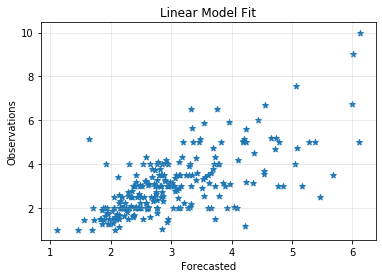

In [21]:
ax = plt.gca()
ax.scatter(fit.fittedvalues,y,marker='*')
ax.set(xlabel='Forecasted',ylabel='Observations',title='Linear Model Fit')
ax.grid(True,alpha=0.3)

## MSE 
Mean squared error the model.

The explained sum of squares divided by the model degrees of freedom

## RMSE / SE

 RMSE = SQRT(MSE)

In [22]:
mse_model = SSR/p ; print ("MSE :{:3.3f}".format(mse_model)) 
RMSE = np.sqrt(mse_model); print ("RMSE :{:3.3f}".format(RMSE)) 

MSE :35.797
RMSE :5.983


Mean squared error of the residuals.

The sum of squared residuals divided by the residual degrees of freedom.

In [23]:
mse_resid = SSR/(n-p-1); mse_resid

1.061780096268993

In [32]:
1 - fit.ssr/fit.centered_tss

0.4613641828591971

250.58010271948234